In [8]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Load INS data
ins_data = pandas.read_csv('csv/3-vectornav-ins.csv')
ins_data = ins_data.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data['time'] = pandas.to_datetime(ins_data['time'])
ins_data['time'] = (ins_data['time'] - ins_data['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data = ins_data.set_index('time')
# Mangitude of speed
ins_data['.mag_speed'] = (ins_data['.NedVel.y']**2 + ins_data['.NedVel.x']**2)**(1/2)


# Load Pacmod Speed Data
# pacmod parsed_txt/vehicle_speed is gets corrupt rows, so we will use as_tx/vehicle_speed
pacmod_speed = pandas.read_csv('csv/3-pacmod-as_tx-vehicle_speed.csv')
pacmod_speed['time'] = pandas.to_datetime(pacmod_speed['time'])
pacmod_speed['time'] = (pacmod_speed['time'] - pacmod_speed['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
# Additionally, there is an factor offset between parsed_txt/vehicle_speed and as_tx/vehicle_speed for whatever reason
# Use 2.237
pacmod_speed['.data'] = pacmod_speed['.data']*2.237
pacmod_speed = pacmod_speed.set_index('time')

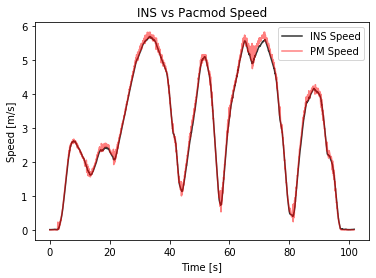

In [9]:
# Plotting

plt.figure()
plt.plot(ins_data.index,ins_data['.mag_speed'],label="INS Speed",alpha=0.8,color='k')
plt.plot(pacmod_speed.index,pacmod_speed['.data'],label="PM Speed",alpha=0.5,color='r')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('INS vs Pacmod Speed')
plt.show();

(16, 26)

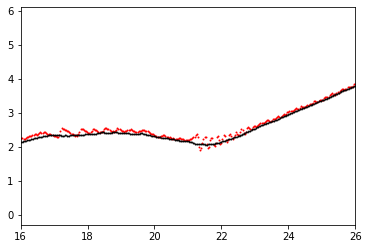

In [22]:
plt.figure()
plt.scatter(pacmod_speed.index,pacmod_speed['.data'],label="PM Speed",alpha=1.0,color='r',s=0.9)
plt.scatter(ins_data.index,ins_data['.mag_speed'],label="INS Speed",alpha=0.8,color='k',s=0.5)
plt.xlim([16,26])